# Generalizing the Machine Learning Process
Date: 2019-05-09  
Author: Jason Beach  
Categories: Process, DataScience  
Tags: machine-learning, best-practice   
<!--eofm-->

This work describes a general approach to follow when performing machine learning (ML) manually, and when automating in a deployment setting.  Unlike a classical statistical analysis, standard machine learning projects typically follow a general and repeatable process.  While the practictioner should be aware of details for each of the steps and the reasons for choosing them, there is much less design-thinking and checking of assumptions that are necessary components of more mathematical modeling fields.  This makes the machine learning process amenable to deployment as a service because automating the re-training and prediction of a model with consistent data is straight-forward programming.

## Model Theory

Most of the design-thinking in the ML process is in choosing a variety of models for comparing performance against.  The following three characteristics succinctly describe a ML model.  See [here]( {{< ref "/posts/blog_page-todo.md" >}}) for more explanation.

1. Representation: structural model characteristics
    - name
    - family
    - interpretability
    - type 
        + generative / discriminative 
        + bias / var
        + fixed- / variable- learner
2. Evaluation: functions applied to the structure
    - objective
    - cost
    - loss
3. Optimization: algorithms necessary to solve for parameters

It is also important to understand how the chosen model effects the modeling process

- assumptions inherent in representation
- alignment of loss function with project goals
- sources of bias / variance
- determination of resource constraints
- enumeration of how over-tuning can occur (regularization)
- understanding when manual methods are ineffective 'fiddling' of model implementation parameters
- statement of strong false assumptions can be better than weak true ones, because they need more data

_Note:_ This should be considered carefully with feature engineering and feature selection to ensure the input transformations align with the model.

## The Machine Learning Process

The following are the general steps taken in the ML Process.  They are similar to many other problem-solving processes, but tailored to ML specifics.  There are a few steps where care should be taken to ensure the process is reasonable.  These are more design-oriented and some research may be necessary depending on the scenario.  

The practicioner must ensure he is maintaining honesty with the investigation.  One important check is laying-out proper evaluation methods, before implementing them.  This is similar to classical statistics in choosing an accepatable p-value before running the model.  They include selecting evaluation scores and how they should be evaluated.  Another check is on model resource and time requirements.  More sophisticated models need more memory to implement and take a longer time to run.  These are highly dependent on the environment they are deployed to.  These should be determined with the customer, at the beginning.  To learn more read, [here]( {{< ref "/posts/blog_page-todo.md" >}}) for more. 

The categories to be predicted on, and the percent of records used for each in training, is a very important subject.  If your target data is of a much lower percentage amount than the rest (needle-in-haystack / imbalanced data problem), then it should be addressed before separating training and testing data.  The most orthodox and direct way to deal with this problem is to simply resample from the target records, with replacement, for enough times to reach 50% of your data.  However, this is an important area of research and some time should be taken before moving forward in the process.  For more information on imbalanced data, check [here]( {{< ref "/posts/blog_page-todo.md" >}}).

While classical statistics places a strong emphasis on model exploration and ensuring assumptions are met, this is less important in ML.  Instead, much more time should be focused on the features used in the model.  This is mainly in the form of Feature Engineering, which can include several different methodologies, such as Feature Extraction, Feature Selection / Dimensionality Reduction, and Feature Engineering.  Read more about this, [here]( {{< ref "/posts/blog_page-todo.md" >}}).  

_Discover_

* determine problem and constraints
* determine characteristics the problem / scenario dictates on the solution
    - model family
    - acceptable methods of dimensionality reduction and regularization
    - deployment environment
* decide evaluation
    - primary / secondary evaluation score (ie. accuracy)
    - methods of evaluation (ie. confusion matrix, roc)


_Collect and Transform_

* obtain raw data 
    - internal data warehouses
    - external APIs and services
* integration and cleaning	
* filter, aggregate, and query


_Summary and Process_

* exploration
* preparation
     - address balance (classification, anova, etc.)
     - create Train, Validate, Test with split (above)
* configure Feature Extraction with feature_union
* configure Preprocess and choose model-families with pipeline


_Build_

* train the models
    - apply k-folds CV and grid search with Training set
    - perform on multiple model-families and hyper-parameters
* evaluate models
    - review afore-mentioned confusion matrix, scoring, classifier-threshold, and tests
    - select the best model-family / hyper-parameters
    - apply to Validation set or all of Training set to model-family to parameterize it and set as the final model
* refine performance
    - debug performance with learning curve, lift chart
    - use Testing set to evaluate final model characteristics
    - export to binary file


_Deliver_

* select solution
    - design interface most appropriate for using the model
    - automate data integration and pipelines
    - implement model in deployable environment
* deploy solution within system environments


_Note:_ Train, Validate, and Test should be from different (independent) data sets, if possible.

## Stakeholder Interaction and Timeline

It is useful to display these in relation to interactions that must take place with stakeholders.  These may be business users who need a problem solved, or technology departments that will have to support applications that implement the solution.  The y-axis show stage proximity to these stakeholders.

While every project is different, most stages use a similar proportion of time.  The horizontal axis lays-out the timeline.

![machine learning process](images/ml_process.png)

## Demonstation

The following code demonstrates the programming portions of these stages and steps using a toy example on a simulated diverse dataset of both numeric and categorical data.  It separates the columns and uses transform pipelines to perform different dimensionality reduction techniques.[^1] This does display the important steps that must be taken with stakeholders. 

### Configuration

Notebook configurations for the kernel and display output.

In [193]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 10)

%matplotlib inline

Provide for utility functions.

In [194]:
import random
import string

def randomString(stringLength=10):
    """Generate a random string of fixed length """
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength))

While importing modules, try to organize them in the order they are used, and by their parent library.

In [195]:
#modules
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

### Collect and transform

Bring internal and external data, together, for a combined and succinct dataset.  Here, we are simulating both categorical and numeric data for the same dataset.

In [195]:
#make data (both numeric and categorical)
iCOLUMNS = 50
iROWS = 1000
#generate classification dataset
from sklearn.datasets.samples_generator import make_blobs
X_cat, Y_cat = make_blobs(n_samples=iROWS, centers=2, n_features=iCOLUMNS, random_state=1)
categories = [randomString(5) for x in range(5)]
cols = [random.choices(categories, k=iCOLUMNS) for _ in range(iROWS)]
X_cat = np.array(cols)


#generate regression dataset
from sklearn.datasets.samples_generator import make_regression
X_num, not_used = make_regression(n_samples=iROWS, n_features=iCOLUMNS, noise=0.1, random_state=1)

Your processing is simplified when most of your work is within a dataframe.

In [196]:
#set in dataframe
dfX_cat = pd.DataFrame(X_cat, columns=['IndepCat-'+str(x) for x in range(iCOLUMNS)] )
dfX_num = pd.DataFrame(X_num, columns=['IndepNum-'+str(x) for x in range(iCOLUMNS)])
dfY_cat = pd.DataFrame(Y_cat, columns=["Dep"])
dfData = pd.concat([dfY_cat, dfX_cat, dfX_num], axis=1)

### Summary and process

Encode your data with transformations in an appropriate order.  Remember that some transformations, such as scaling, should be performed after separation of testing and training datasets because you will be dividing all records by the maximum value, within the dataset.  In model implementation, you would not see the maximum value of your original testing dataset; rather, you would use the current dataset.

In [198]:
#separate
X = dfData.drop('Dep', axis=1)
y = dfData['Dep']

#encode y and create datasets
enc = LabelEncoder()
y_set = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_set, test_size=0.2)

print( "Training records: %s"%(X_train.shape[0]) )
print( "Testing records: %s"%(X_test.shape[0]) )

Training records: 800
Testing records: 200


Here, you perform scaling, imputation, Principal Component Analysis (PCA), and other transformations whose arguments are dependent upon the same dataset.

Also, the transformation pipelines should be divided into numeric and categoric because some transformations, such as PCA, are inappropriate for categoric data.  Instead use methods, such as _Select K Best_, for dimensionality reduction.

Working with pipelines can be unwieldly at some times.  For a reference of pipelines, see [sklearn docs](https://scikit-learn.org/stable/modules/compose.html#pipelines-and-composite-estimators).

In [199]:
#create feature union of numeric data
features = []
features.append(('pca', PCA()))                    #<<<GRID
features.append(('select_best', SelectKBest()))    #<<<GRID
num_feature_eng = FeatureUnion(features)

#create the preprocessing pipelines for both numeric and categorical data
numeric_features = [x for x in X_train.columns if x.split('-')[0]=='IndepNum' ]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('num_feature_eng', num_feature_eng)
])

categorical_features =  [x for x in X_train.columns if x.split('-')[0]=='IndepCat' ]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('select_best', SelectKBest(k=6))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#append classifier to preprocessing pipeline
#full prediction pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

Optimize your hyper-parameters in a grid search.  You may have to get output for all the pipeline keys to find their names because the notation can become quite lenthy based on the amount of nesting, such as this pipeline displays.

In [200]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
    'preprocessor__num__num_feature_eng__pca__n_components': [.75, .80, .85, .90, .95],
    'preprocessor__num__num_feature_eng__select_best__k': [5, 7, 9, 11]
}
gridClf = GridSearchCV(clf, param_grid, cv=5)

### Build

Build your model through optimizing values over the grid.  This is usually based on stochastic gradient descent, or some other iterative routine.  Convergence may be time-consuming depending on the model you've chosen and the number of parameters and hyper-parameters that must be selected.  NaiveBayes methods can be some of the most costly.  Run more balanced models, first, to get an idea of the parameter space, before trying more costly approaches.  

In [201]:
gridClf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'preprocessor__num__imputer__strategy': ['mean', 'median'], 'classifier__C': [0.1, 1.0, 10, 100], 'preprocessor__num__num_feature_eng__pca__n_components': [0.75, 0.8, 0.85, 0.9, 0.95], 'preprocessor__num__num_feature_eng__select_best__k': [5, 7, 9, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Take the _best_ model with parameters / hyper-parameters from highest grid-search, cross-validation, and apply it to the test data.  This data is simulated and you should be able to perform better than a coin-flip (50%).

In [202]:
print(("best logistic regression from grid search: %.3f"
       % gridClf.score(X_test, y_test)))

best logistic regression from grid search: 0.515


Get an idea of the results and parameter space.  Extreme values may indicate over-fitting or some other anomaly is occuring.

In [219]:
# Cross Validation
#GridSearchCV: Mean cross-validated score of the best_estimator
#SGDClassifier: Returns the mean accuracy on the given test data and labels
print("Best Score: (CV score=%0.3f)" % gridClf.best_score_)
print("\n")
print("Best Parameters\n %s" % gridClf.best_params_ )
print("\n")
print("Best Estimator\n %s" %  gridClf.best_estimator_ )

Best Score: (CV score=0.484)


Best Parameters
 {'classifier__C': 10, 'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__num__num_feature_eng__pca__n_components': 0.9, 'preprocessor__num__num_feature_eng__select_best__k': 5}


Best Estimator
 Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])


A confusion matrix is your basic display of results.  This is for your training data.

In [221]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_train_pred = gridClf.predict(X_train)
print( "Confusion matrix: Training")
confusion_matrix(y_train, y_train_pred)

Confusion matrix: Training


array([[255, 149],
       [146, 250]])

This confusion matrix is for your test data.

In [222]:
y_pred = gridClf.predict(X_test)
print( "Confusion matrix: Testing")
confusion_matrix(y_test, y_pred)

Confusion matrix: Testing


array([[51, 45],
       [52, 52]])

After getting a general feel for the situation, look at the specific performance metrics you set, at the beginning of your problem statement.  Ensure you hold yourself to this standard and do not change the solutions' needs based on current results.  For a complete listing of performance metrics, view the [sklearn docs](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation-quantifying-the-quality-of-predictions).

In [223]:
# Testing

#predictions for outcome labels
#Predict class probabilities for X.  The predicted class probabilities of an input sample are computed as the mean predicted
#class probabilities of the trees in the forest. The class probability of a single tree is the fraction of samples of the same
#class in a leaf.
y_class_prob = gridClf.predict_proba(X_test)                # called   predict_proba(), for some classifiers
y_prob = np.asarray( [x[1] for x in y_class_prob], dtype=np.float32)
threshold = 0                                               # set threshold
y_some_digit_pred = (y_prob > threshold)
print( "Average training probability: %0.3f" % np.mean(y_prob) )

#roc auc
from sklearn.metrics import roc_auc_score
print( "Area Under ROC Curve: %0.3f" % roc_auc_score(y_test, y_prob) )

Average training probability: 0.484
Area Under ROC Curve: 0.492


A variety of different plots can be used to explore model and result performance.  The ROC Curve is one of the most fundamental, but several others are of importance.  Performance graphs are explained in the [sklearn docs](https://scikit-learn.org/stable/modules/learning_curve.html#validation-curves-plotting-scores-to-evaluate-models). 

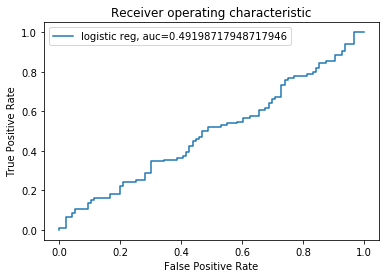

In [234]:
log_y_prob = gridClf.decision_function(X_test) 

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

#plt.figure(0).clf()

#LogisticRegression  
y_prob = log_y_prob
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob)
auc = metrics.roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr,label="logistic reg, auc="+str(auc))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=0)
plt.show()

### Deliver

Save the model for future use, especially if you just spent a large amount of time getting the algorithm to converge.

In [ ]:
from sklearn.externals import joblib
import os

cwd = os.getcwd()
file_path = cwd+'/Data/project/Models/'

#save the model to disk
filename = file_path+'finalized_model.sav'
joblib.dump(gridClf, filename)

Implement the model within the necessary solution system.

In [ ]:
#in deployment application...
#load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

## Conclusion

In this work, we provide an orthodox approach to the ML Process.  We list the stages involved and the steps for each, and align these with more traditional modeling and analysis processes.  Demo code runs through the basic ideas.  This code can be modified in order to automate processing in a separate environment, such as a deployed service.  The complete process can be generalized to many situations.

[^1]: [Column Transformer with Mixed Types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py)